In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import matplotlib
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [338]:
data1=pd.read_excel("C:/Users/Tushar/Desktop/CO2 data.xlsx")

In [339]:
df=data1.copy()
df.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [340]:
df.isnull().sum()

Year    0
CO2     0
dtype: int64

In [341]:
df.dtypes

Year      int64
CO2     float64
dtype: object

In [342]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,215.0,1907.00000,62.209324,1800.00000,1853.50000,1907.00,1960.5,2014.0
CO2,215.0,6.74197,6.522437,0.00175,0.04105,6.39,11.5,18.2


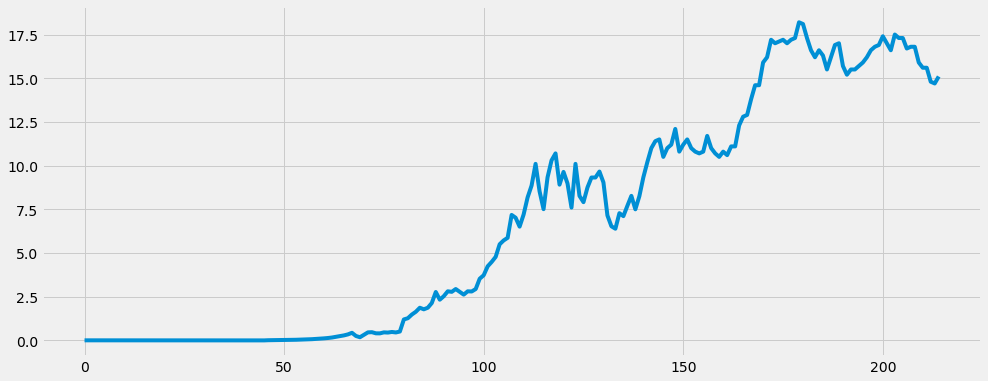

In [343]:
df['CO2'].plot(figsize=(15, 6))
plt.show()

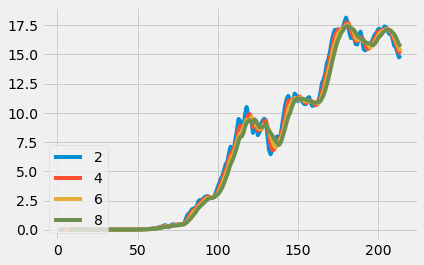

In [344]:
for i in range(2,10,2):
    df["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

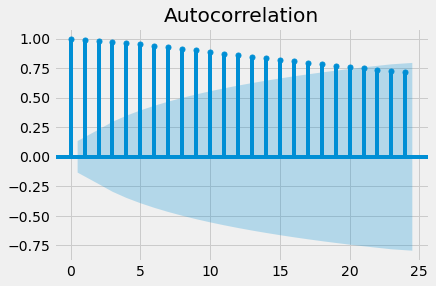

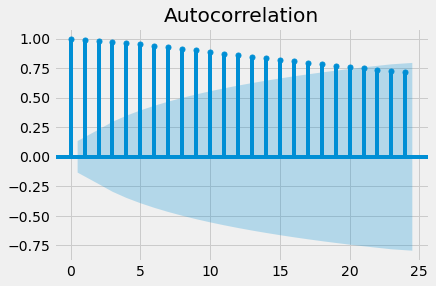

In [345]:
tsa_plots.plot_acf(df.CO2)

In [346]:
X = df['CO2'].values

In [347]:
size = int(len(X) * 0.66)

In [348]:
train, test = X[0:size], X[size:len(X)]

In [349]:
model = ARIMA(train, order=(5,1,0))

In [350]:
model_fit = model.fit(disp=0)

In [351]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  140
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -105.293
Method:                       css-mle   S.D. of innovations              0.513
Date:                Thu, 09 Dec 2021   AIC                            224.587
Time:                        17:45:25   BIC                            245.178
Sample:                             1   HQIC                           232.955
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0642      0.033      1.950      0.051      -0.000       0.129
ar.L1.D.y     -0.1022      0.085     -1.203      0.229      -0.269       0.064
ar.L2.D.y     -0.2476      0.085     -2.923      0.0

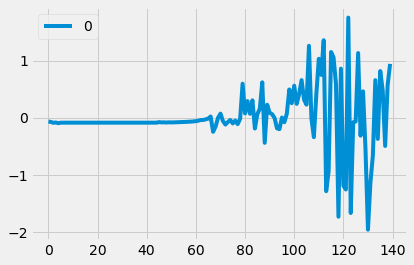

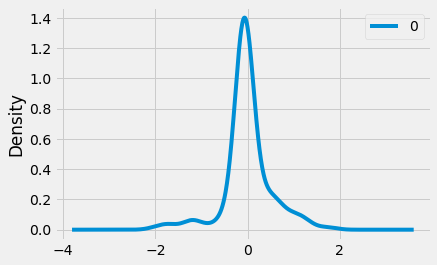

                0
count  140.000000
mean    -0.000243
std      0.514659
min     -1.953998
25%     -0.084927
50%     -0.079080
75%      0.071623
max      1.749676


In [352]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [353]:
history = [x for x in train]

In [354]:
predictions = list()

In [355]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=9.034344, expected=10.200000
predicted=10.201681, expected=11.000000
predicted=10.762199, expected=11.400000
predicted=11.374819, expected=11.500000
predicted=11.630693, expected=10.500000
predicted=10.603882, expected=11.000000
predicted=11.291246, expected=11.200000
predicted=11.123260, expected=12.100000
predicted=12.300662, expected=10.800000
predicted=10.695948, expected=11.200000
predicted=11.542608, expected=11.500000
predicted=11.364261, expected=11.000000
predicted=11.321094, expected=10.800000
predicted=10.880475, expected=10.700000
predicted=10.809004, expected=10.800000
predicted=10.953771, expected=11.700000
predicted=11.664454, expected=11.000000
predicted=10.997022, expected=10.700000
predicted=10.971129, expected=10.500000
predicted=10.548790, expected=10.800000
predicted=11.025650, expected=10.600000
predicted=10.608716, expected=11.100000
predicted=11.173895, expected=11.100000
predicted=11.049064, expected=12.300000
predicted=12.311227, expected=12.800000
p

In [356]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.355


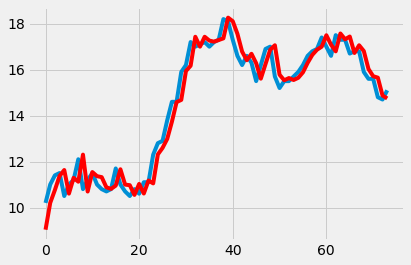

In [357]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()